# WEEK5 HW

## HW1
### 모두의딥러닝 시즌2 강의의 longsequence 코드 lstm 모델 적용해보기

In [1]:
import torch
import torch.optim as optim
import numpy as np

In [2]:
torch.manual_seed(0)

In [3]:
sentence = ("the most beautiful things in the world cannot be seen or"
            "touched, they are felt with the heart.")

In [4]:
# make dictionary
char_set = list(set(sentence))
char_dic = {c : i for i, c in enumerate(char_set)}

In [5]:
char_dic

{'e': 0,
 'n': 1,
 'r': 2,
 'o': 3,
 ' ': 4,
 'u': 5,
 'i': 6,
 'g': 7,
 'd': 8,
 'b': 9,
 'h': 10,
 't': 11,
 'y': 12,
 'l': 13,
 '.': 14,
 'f': 15,
 'a': 16,
 'c': 17,
 ',': 18,
 'w': 19,
 's': 20,
 'm': 21}

In [6]:
# hyper parameters
dic_size = len(char_dic)
hidden_size = len(char_dic)
sequence_length = 10
learning_rate = 0.1

In [7]:
# data setting
x_data = []
y_data = []

for i in range(0, len(sentence) - sequence_length):
    x_str = sentence[i: i + sequence_length]
    y_str = sentence[i + 1 : i + sequence_length + 1]
    print(i, x_str, '->', y_str)
    
    x_data.append([char_dic[c] for c in x_str]) # x str to index
    y_data.append([char_dic[c] for c in y_str]) # y str to index
    
x_one_hot = [np.eye(dic_size)[x] for x in x_data]

0 the most b -> he most be
1 he most be -> e most bea
2 e most bea ->  most beau
3  most beau -> most beaut
4 most beaut -> ost beauti
5 ost beauti -> st beautif
6 st beautif -> t beautifu
7 t beautifu ->  beautiful
8  beautiful -> beautiful 
9 beautiful  -> eautiful t
10 eautiful t -> autiful th
11 autiful th -> utiful thi
12 utiful thi -> tiful thin
13 tiful thin -> iful thing
14 iful thing -> ful things
15 ful things -> ul things 
16 ul things  -> l things i
17 l things i ->  things in
18  things in -> things in 
19 things in  -> hings in t
20 hings in t -> ings in th
21 ings in th -> ngs in the
22 ngs in the -> gs in the 
23 gs in the  -> s in the w
24 s in the w ->  in the wo
25  in the wo -> in the wor
26 in the wor -> n the worl
27 n the worl ->  the world
28  the world -> the world 
29 the world  -> he world c
30 he world c -> e world ca
31 e world ca ->  world can
32  world can -> world cann
33 world cann -> orld canno
34 orld canno -> rld cannot
35 rld cannot -> ld cannot 
36

In [8]:
x_one_hot[0].shape #(sequence_length, char_dic_len)

(10, 22)

In [9]:
len(x_one_hot) #len(sentence) - len(sequence)

84

In [10]:
# transform as torch tensor variable
X = torch.FloatTensor(x_one_hot)
y = torch.LongTensor(y_data)

In [11]:
# LSTM + FC

class Net(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, layers):
        super(Net, self).__init__()
        self.lstm = torch.nn.LSTM(input_dim, hidden_dim, num_layers = layers,
                                 batch_first = True)
        self.fc = torch.nn.Linear(hidden_dim, hidden_dim, bias = True)
        
    def forward(self, x):
        x, _status = self.lstm(x)
        x = self.fc(x)
        return x

In [12]:
net = Net(dic_size, hidden_size, 2)

In [13]:
# loss & optimizer setting
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), learning_rate)

In [14]:
# start training

for i in range(100):
    optimizer.zero_grad()
    outputs = net(X)
    loss = criterion(outputs.view(-1, dic_size), y.view(-1))
    loss.backward()
    optimizer.step()
    
    results = outputs.argmax(dim = 2)
    predict_str = ""
    
    for j, result in enumerate(results):
        if j == 0:
            predict_str = ''.join([char_set[t] for t in result])
        else:
            predict_str += char_set[result[-1]]
            
    print(i, " : ", predict_str)

0  :  nnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnn
1  :  nnhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhh
2  :  eeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee
3  :                                                                                               
4  :                                                                                               
5  :                                                                                               
6  :          e                ee           e      e                                e    e         
7  :     e    e                ee     e     e      e           e            e       e    e   e     
8  :          h   h            eh     h     h      e           e    n               eh   e         
9  :    nnt   n   n       hnn   nh    nn    n  nh               n   n   hh           nh   h        


87  :  he most beautiful things in the world cannot be seen ortouched, they are felt with the heart.
88  :  he wost beautiful things in the world cannot be seen ortouched, they are felt with the heart.
89  :  he wost beautiful things in the world cannot be seen ortouched, they are felt with the heart.
90  :  he wost beautiful things in the world cannot be seen ortouched, they are felt with the heart.
91  :  he most beautiful things in the world cannot be seen ortouched, they are felt with the heart.
92  :  he wost beautiful things in the world cannot be seen ortouched, they are felt with the heart.
93  :  he wost beautiful things in the world cannot be seen ortouched, they are felt with the heart.
94  :  he most beautiful things in the world cannot be seen ortouched, they are felt with the heart.
95  :  he wost beautiful things in the world cannot be seen ortouched, they are felt with the heart.
96  :  he most beautiful things in the world cannot be seen ortouched, they are felt with t

In [15]:
print(predict_str)

he most beautiful things in the world cannot be seen ortouched, they are felt with the heart.


## HW2

https://tutorials.pytorch.kr/intermediate/char_rnn_classification_tutorial.html
위 링크 따라해보기!

In [16]:
from __future__ import unicode_literals, print_function, division
from io import open
import glob
import os

def findFiles(path): return glob.glob(path)

print(findFiles('data/names/*.txt'))

import unicodedata 
import string

all_letters = string.ascii_letters + " .:;'"
n_letters = len(all_letters)

['data/names/Czech.txt', 'data/names/German.txt', 'data/names/Arabic.txt', 'data/names/Japanese.txt', 'data/names/Chinese.txt', 'data/names/Vietnamese.txt', 'data/names/Russian.txt', 'data/names/French.txt', 'data/names/Irish.txt', 'data/names/English.txt', 'data/names/Spanish.txt', 'data/names/Greek.txt', 'data/names/Italian.txt', 'data/names/Portuguese.txt', 'data/names/Scottish.txt', 'data/names/Dutch.txt', 'data/names/Korean.txt', 'data/names/Polish.txt']


In [17]:
def unicodeToAscii(s):
    return ''.join(
    c for c in unicodedata.normalize('NFD', s)
    if unicodedata.category(c) != 'Mn'
    and c in all_letters)

print(unicodeToAscii('Ślusàrski'))

Slusarski


In [18]:
# 각 언어의 이름 목록인 category_lines 사전 생성
category_lines = {}
all_categories = []

# 파일을 읽고 줄 단위로 분리
def readLines(filename):
    lines = open(filename, encoding='utf-8').read().strip().split('\n')
    return [unicodeToAscii(line) for line in lines]

for filename in findFiles('data/names/*.txt'):
    category = os.path.splitext(os.path.basename(filename))[0]
    all_categories.append(category)
    lines = readLines(filename)
    category_lines[category] = lines

n_categories = len(all_categories)

In [19]:
print(category_lines['Italian'][:5])

['Abandonato', 'Abatangelo', 'Abatantuono', 'Abate', 'Abategiovanni']


In [20]:
import torch

# all_letters 로 문자의 주소 찾기, 예시 "a" = 0
def letterToIndex(letter):
    return all_letters.find(letter)

# 검증을 위해서 한개의 문자를 <1 x n_letters> Tensor로 변환
def letterToTensor(letter):
    tensor = torch.zeros(1, n_letters)
    tensor[0][letterToIndex(letter)] = 1
    return tensor

# 한 줄(이름)을  <line_length x 1 x n_letters>,
# 또는 One-Hot 문자 벡터의 Array로 변경
def lineToTensor(line):
    tensor = torch.zeros(len(line), 1, n_letters)
    for li, letter in enumerate(line):
        tensor[li][0][letterToIndex(letter)] = 1
    return tensor

print(letterToTensor('J'))

print(lineToTensor('Jones').size())

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.]])
torch.Size([5, 1, 57])


In [21]:
import torch.nn as nn

class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()

        self.hidden_size = hidden_size

        self.i2h = nn.Linear(input_size + hidden_size, hidden_size)
        self.i2o = nn.Linear(input_size + hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, input, hidden):
        combined = torch.cat((input, hidden), 1)
        hidden = self.i2h(combined)
        output = self.i2o(combined)
        output = self.softmax(output)
        return output, hidden

    def initHidden(self):
        return torch.zeros(1, self.hidden_size)

n_hidden = 128
rnn = RNN(n_letters, n_hidden, n_categories)

In [22]:
input = letterToTensor('A')
hidden =torch.zeros(1, n_hidden)

output, next_hidden = rnn(input, hidden)

In [23]:
input = lineToTensor('Albert')
hidden = torch.zeros(1, n_hidden)

output, next_hidden = rnn(input[0], hidden)
print(output)

tensor([[-2.9439, -2.9178, -2.9292, -2.8260, -2.8556, -2.8115, -3.0105, -2.8162,
         -2.9158, -2.8100, -2.8975, -2.9062, -3.0179, -2.8529, -2.8911, -2.8768,
         -2.8388, -2.9421]], grad_fn=<LogSoftmaxBackward>)


In [24]:
def categoryFromOutput(output):
    top_n, top_i = output.topk(1) # 텐서의 가장 큰 값 및 주소
    category_i = top_i[0].item()     # 텐서에서 정수 값으로 변경
    return all_categories[category_i], category_i

print(categoryFromOutput(output))

('English', 9)


In [25]:
import random

def randomChoice(l):
    return l[random.randint(0, len(l) - 1)]

def randomTrainingExample():
    category = randomChoice(all_categories)
    line = randomChoice(category_lines[category])
    category_tensor = torch.tensor([all_categories.index(category)], dtype=torch.long)
    line_tensor = lineToTensor(line)
    return category, line, category_tensor, line_tensor

for i in range(10):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    print('category =', category, '/ line =', line)

category = Greek / line = Frangopoulos
category = Czech / line = Tomes
category = French / line = St pierre
category = Dutch / line = Rademakers
category = Greek / line = Patrianakos
category = French / line = Renaud
category = Japanese / line = Isozaki
category = Italian / line = Naggia
category = Italian / line = Cantu
category = German / line = Bauers


In [26]:
criterion = nn.NLLLoss()

In [27]:
learning_rate = 0.005

def train(category_tensor, line_tensor):
    hidden = rnn.initHidden()

    rnn.zero_grad()

    for i in range(line_tensor.size()[0]):
        output, hidden = rnn(line_tensor[i], hidden)

    loss = criterion(output, category_tensor)
    loss.backward()

    for p in rnn.parameters():
        p.data.add_(p.grad.data, alpha=-learning_rate)

    return output, loss.item()

In [28]:
import time
import math

n_iters = 100000
print_every = 5000
plot_every = 1000



# 도식화를 위한 손실 추적
current_loss = 0
all_losses = []

def timeSince(since):
    now = time.time()
    s = now - since
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)

start = time.time()

for iter in range(1, n_iters + 1):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    output, loss = train(category_tensor, line_tensor)
    current_loss += loss

    if iter % print_every == 0:
        guess, guess_i = categoryFromOutput(output)
        correct = '✓' if guess == category else '✗ (%s)' % category
        print('%d %d%% (%s) %.4f %s / %s %s' % (iter, iter / n_iters * 100, timeSince(start), loss, line, guess, correct))

    if iter % plot_every == 0:
        all_losses.append(current_loss / plot_every)
        current_loss = 0

5000 5% (0m 6s) 3.1010 Mccallum / Russian ✗ (Scottish)
10000 10% (0m 13s) 0.9468 Thuy / Vietnamese ✓
15000 15% (0m 20s) 1.0385 Bei / Chinese ✓
20000 20% (0m 27s) 2.7959 Marchand / Scottish ✗ (French)
25000 25% (0m 34s) 0.8223 Prosdocimi / Italian ✓
30000 30% (0m 41s) 1.7020 Guirguis / Portuguese ✗ (Arabic)
35000 35% (0m 49s) 1.8190 Glen / Dutch ✗ (English)
40000 40% (0m 56s) 1.7199 Andreu / Portuguese ✗ (Spanish)
45000 45% (1m 3s) 4.2563 Manus / Arabic ✗ (Irish)
50000 50% (1m 10s) 0.3793 Tchekhluev / Russian ✓
55000 55% (1m 17s) 0.2750 Ekimov / Russian ✓
60000 60% (1m 24s) 0.7087 Si / Korean ✓
65000 65% (1m 31s) 2.3635 Kenmotsu / German ✗ (Japanese)
70000 70% (1m 38s) 5.6896 Boulos / Greek ✗ (Arabic)
75000 75% (1m 45s) 0.7177 Fujiwara / Japanese ✓
80000 80% (1m 52s) 1.4487 Reiher / Dutch ✗ (German)
85000 85% (1m 59s) 0.8335 Juzeev / Russian ✓
90000 90% (2m 6s) 0.4116 Dao / Vietnamese ✓
95000 95% (2m 14s) 1.5495 Bell / German ✗ (Scottish)
100000 100% (2m 21s) 3.4216 Giolla / Spanish ✗ (

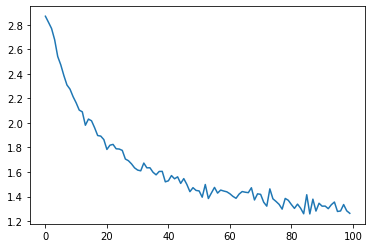

In [29]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.figure()
plt.plot(all_losses)

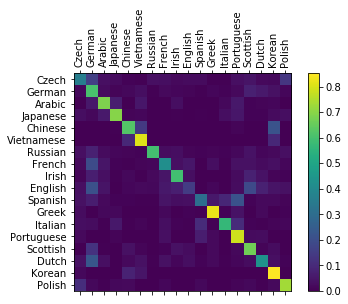

In [30]:
# 혼란 행렬에서 정확한 추측을 추적
confusion = torch.zeros(n_categories, n_categories)
n_confusion = 10000

# 주어진 라인의 출력 반환
def evaluate(line_tensor):
    hidden = rnn.initHidden()

    for i in range(line_tensor.size()[0]):
        output, hidden = rnn(line_tensor[i], hidden)

    return output

# 예시들 중에 어떤 것이 정확하게 예측되었는지 기록
for i in range(n_confusion):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    output = evaluate(line_tensor)
    guess, guess_i = categoryFromOutput(output)
    category_i = all_categories.index(category)
    confusion[category_i][guess_i] += 1

# 모든 행을 합계로 나누어 정규화
for i in range(n_categories):
    confusion[i] = confusion[i] / confusion[i].sum()

# 도식 설정
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(confusion.numpy())
fig.colorbar(cax)

# 축 설정
ax.set_xticklabels([''] + all_categories, rotation=90)
ax.set_yticklabels([''] + all_categories)

# 모든 tick에서 레이블 지정
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

# sphinx_gallery_thumbnail_number = 2
plt.show()

In [31]:
def predict(input_line, n_predictions=3):
    print('\n> %s' % input_line)
    with torch.no_grad():
        output = evaluate(lineToTensor(input_line))

        # Get top N categories
        topv, topi = output.topk(n_predictions, 1, True)
        predictions = []

        for i in range(n_predictions):
            value = topv[0][i].item()
            category_index = topi[0][i].item()
            print('(%.2f) %s' % (value, all_categories[category_index]))
            predictions.append([value, all_categories[category_index]])

predict('Dovesky')
predict('Jackson')
predict('Satoshi')


> Dovesky
(-0.61) Russian
(-1.05) Czech
(-3.11) Polish

> Jackson
(-0.22) Scottish
(-2.63) English
(-3.02) Russian

> Satoshi
(-0.94) Japanese
(-1.76) Arabic
(-1.97) Italian
